# Microtransduceurs - Study of Piezoelectric Actuators
Alexis Draussin and Antoine Richard - Université de Franche-Comté - Master ISC/SIS 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [26]:
# Displacement for 24V - T220-A4-503
V = 24 # V
d31 = -190e-12 # m/V, A4 correponds to PSI-5A4E ceramic
T = 510e-6 # thickness for T220
L = 63.5e-3 # length for 503 size area
x_series = 2 * L**2 * V * d31 / T**2
x_parallel = 2 * x_series

print(x_series, x_parallel)

-0.00014138454440599767 -0.00028276908881199534


In [15]:
# Calibration
V_cal = np.array([-9.06, -8.28, -7.34, -5.93, -5, -4.06, -3.125, -2.18, -1.09, 0, 1.4, 2.81, 3.9, 5.15, 7.96, 9.37, 10])
X_cal = np.arange(11.35, 12.16, 0.05) # mm
X_cal = X_cal - 11.8

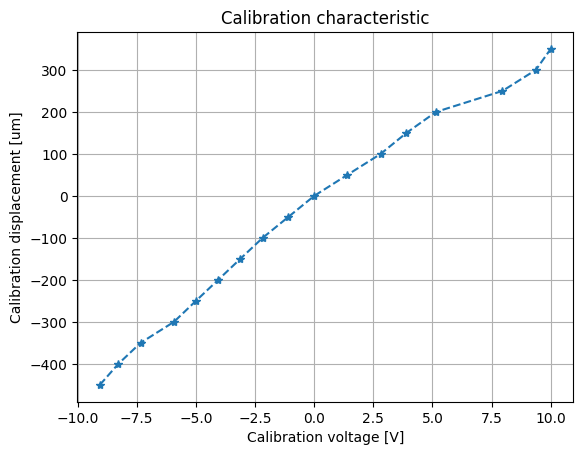

In [24]:
# Calibration plot
plt.plot(V_cal, X_cal*1e3, "--*")
plt.xlabel("Calibration voltage [V]")
plt.ylabel("Calibration displacement [um]")
plt.title("Calibration characteristic")
plt.grid()

In [30]:
# Interpolation
dX_f = interp1d(V_cal, X_cal*1e-3, 'cubic') # in meters

In [17]:
# Measurements
V_apply = np.arange(-25, 26, 5)
V_mes = np.array([3.438, 3.156, 2.594, 2.062, 1.047, 0, -0.484, -1.172, -1.594, -2.219, -2.781])

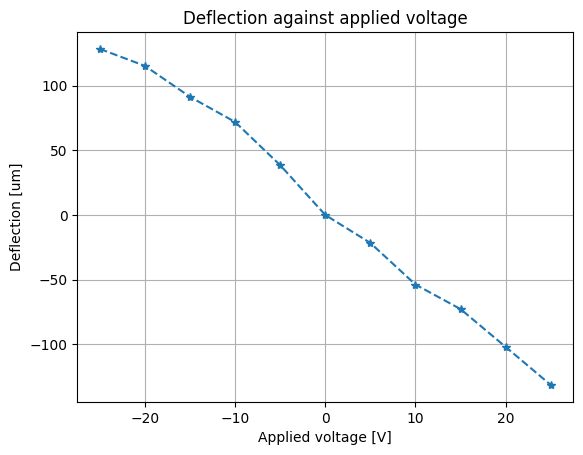

In [28]:
# Plot
plt.plot(V_apply, dX_f(V_mes)*1e6, "--*")
plt.xlabel("Applied voltage [V]")
plt.ylabel("Deflection [um]")
plt.title("Deflection against applied voltage")
plt.grid()

In [47]:
def model_f(x, a, b):
    return a*x+b

coeff, _ = curve_fit(model_f, V_apply, dX_f(V_mes))
d31 = coeff[0] * T**2 / (2 * L**2) # reverse the first equation

print(d31) # d31_th = -190e-12

-1.7414158646249522e-10
